# Overview of aitk.robots

This is an overview of the Python package `aitk.robots`. It features the following:

* Simulation of mobile robots
* Written in pure-Python
* Balance of speed and features, including 3D camera views
* Designed for research, education, and exploration
* Can be used with modern JupyterLab and Notebooks
* Creates easily reproducible experiments for Machine Learning

You can install bare `aitk.robots` package with the command-line:

```shell
pip install aitk.robots
```

Or, if using with Jupyter Lab 3.0:

```shell
pip install "aitk.robots[jupyter]"
jupyter labextension install @jupyter-widgets/jupyterlab-manager ipycanvas
```

If you have installed `aitk.robots` before and want to install the latest version, add the flag `--upgrade` to the above `pip` commands.

## What is aitk?

`aitk` stands for Artificial Intelligence Toolkit. The package `robots` contains tools for running simulated mobile (wheeled) robots. You can install just the `robots` package (as described above), or install the entire suite of tools with:

```shell
pip install aitk
```

If you have installed `aitk` (or any `aitk` packages) before and want to install the latest versions, add the flag `--upgrade` to the above command.

## Getting Started

Whether you are in a Notebook (like this example) or in a Python script, you will need to import the `aitk.robots` library:

In [1]:
import aitk.robots as bots
bots.__version__

'0.8.11'

A common first check is to print out the version of the library to make sure it is the appropriate version. The code in this notebook is written for aitk.robots version 1, so you should see a version that starts with "1".

<div class="alert alert-block alert-info">

<b>Troubleshooting:</b> if you aren't able to import `aitk.robots`, make sure you are installing with the correct `pip`. In a Notebook, you can use the `%pip` magic. At the shell you can use `python -m pip` instead.
</div>

## bots?

Notice in the above cell that we imported `aitk.robots` as `bots`. That makes `bots` just a shorthand so that we don't have to write `aitk.robots`. We'll use this convention throughout these examples.

Ok, let's simulate!

## bots.World

In [2]:
world = bots.World(width=100, height=100)

Random seed set to: 655508


The above command created a world that is 100 cm by 100 cm. Also, it displayed a "Random seed". This is shown so that you can create reproducible simulations. If you do not manually set a seed, then it will generate one for you, and print it out.

If you are in a Jupyter Notebook, then we can generate an image of the world, and display it right here:

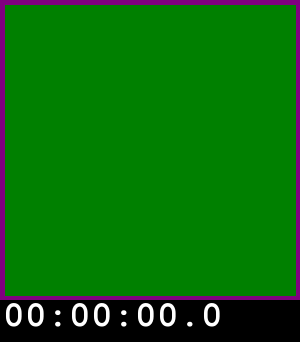

In [3]:
world.display()

If you are not in a Jupyter Notebook, you could still generate a Python Image Library image of the world and display it in the console with this command:

```python
world.get_image().show()
```

That would open up a window on your computer, like this:

![](./images/world-show.png)

The image of a World shows a 2D, top-down view of the world and everything in it. By default the "ground" is green, and there is a purple border around the whole world. The image if the world also shows the elapsed time in the simulation in "HH:MM:SS.S" (2 digits of hours, 2 digits of minutes, and 3 digits showing tenths of a second).

We can add any of the following items to the world:

* robots
* walls
* lights (called "bulbs")

We'll add each of those in the following sections. Let's start by adding a robot.

## bots.Robot

Although there is a `bots.Robot`, we'll use the subclass `Scribbler` because robots need a "body" and the base class `Robot` doesn't have one.

The Scribbler is a robot manufactured by [Parallax, inc](https://en.wikipedia.org/wiki/Parallax,_Inc.) and looks like this in the real world with a Camera by the [Institute for Personal Robots in Education](https://en.wikipedia.org/wiki/Institute_for_Personal_Robots_in_Education):

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Scribbler_robot.jpg" width="400px">

We use the simulated Scribbler robot as it makes a fine base for many of the examples. However, you can easily create your own simulated robot by simply defining a body.

We'll make a lightblue-colored Scribbler (to match the IRL version) and save it to a variable named `robot`:

In [4]:
robot = bots.Scribbler(color="lightblue")

Next, we'll add it to the world:

In [5]:
world.add_robot(robot)

<div class="alert alert-block alert-info">

<b>Troubleshooting:</b> if you try to add the same robot to the world more than once, you will get an error. However, you can add multiple robots as we'll see below.
</div>


How do we know the world now has a robot in it? Well, one way is to display it again:

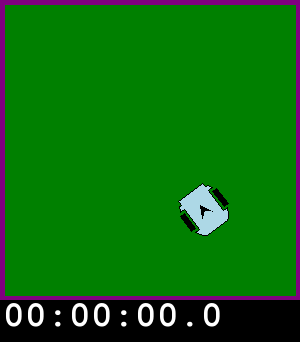

In [6]:
world.display()

You should see a lightblue robot in the world somewhere, facing in a random direction. We could have added the robot to an exact place, facing a precise direction. 

The location and direction of a robot can be seen by using the `get_pose()` method:

In [7]:
robot.get_pose()

(68, 70, 127.61629615561935)

That returns the robot's pose:

* x, the distance in cm from left border of world
* y, the distance in cm from the top border of the world
* a, the angle in degrees, with 0 facing right, moving counter-clockwise as it increases

You can also get this imformation from the robot's representation:

In [8]:
robot

<Robot(name='Scribbie', x=68, y=70, a=127.62)>

Because we did not specify a pose, the world put the robot into an unoccupied random location.

## Hello, world!

In summary (with something slightly new), here is an end-to-end example of "Hello, world!" in aitk.robots:

In [9]:
import aitk.robots as bots
world = bots.World(150, 40) # width, height
robot = bots.Scribbler(20, 25, 90) # x, y, a, default color is red
world.add_robot(robot)
robot.speak("Hello, World!") # new command!
world.watch()

Random seed set to: 4582826


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

The Robot `speak()` method takes a short string (perhaps with newlines) and shows the robot speaking it in a speech bubble. This is useful for debugging robot behaviors, as we will see.  For now, we just say "hi!"

Now, let's build a larger, more realistic world.

## Walls

In [10]:
world2 = bots.World(500, 200)

Random seed set to: 8041646


In [11]:
world2.watch(width="100%")

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

If you right-click (or command-click) to the left of the world view above, and select "New View for Output":

<img src="./images/new-view-for-output.png">

In [12]:
world2.add_wall("blue", 100, 0, 110, 150)

In [13]:
world2.add_wall("red", 200, 50, 210, 200)

In [14]:
world2.add_wall("silver", 300, 0, 310, 150)

In [15]:
world2.add_wall("black", 400, 50, 410, 200)

In [16]:
world2.add_bulb("yellow", 450, 100, 0, 3)

In [17]:
robot2 = bots.Scribbler(50, 100, 0)

In [18]:
world2.add_robot(robot2)

In [19]:
world2.draw()

## Devices

Devices:

* range sensors (like IR and Laser)
* cameras (forward and ground-facing)
* light sensors

In [20]:
robot2.add_device(bots.Camera())

In [21]:
robot2["camera"].watch()

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00@\x00\x00\x00 \x08\x06\x00\x00\x00\xa2\x9d~\x84\x…

In [22]:
import aitk.utils

In [23]:
joystick = aitk.utils.make_joystick(function=robot2.move)

This world is not running


In [24]:
joystick.watch()

Canvas(height=250, layout=Layout(max_height='250px', min_width='250px'), width=250)

In [25]:
world2.run(background=True)

Starting world.run() in background. Use world.stop()


In [26]:
world2.stop()

Stopping thread...


In [27]:
world2.save()

In [29]:
world2.reset()

Using random seed: 8041646
